In [1]:
import pandas as pd

In [2]:
df_input = pd.read_excel('./SalCIS_ORF.xlsx')

In [3]:
import numpy as np

In [4]:
df_input['FASTA protein sequence'] = df_input['FASTA protein sequence'].str.replace('*','')

In [5]:
df_input = df_input.dropna(axis=0)

In [6]:
df_input.head()

,ORF number,PlotOrder,Given Nomenclature,Size,HHPred predicted/experimental function,FASTA protein sequence
0,1,17,SalCis16a,22kDa,Cap,MLDLCLNYLKERMNQSVKNVFDLADDLVIVSPPTDLDGSKLPKIQN...
1,2,16,SalCis16b,29kDa,Cap adaptor,MADYQTILTISVLHEYYNASSDKFAPIGLVADRETVLLLRQYGILL...
2,3,2,SalCis2,57kDa,Tail sheath tube/protein transport,MGVMKTPGVYIVEQNAFPNSVVEVATAVPAFIGYTEKADNGGKSLS...
3,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
4,5,5,SalCis5,17kDa,Inner tube initiator,MVTAKGSGAAQGDGDWPLPAFYFSVSISGCADDTAFQEVSGLEFQI...


In [7]:
fasta_column_header = 'FASTA protein sequence'

In [8]:
import os
import re
import json

In [9]:
df = pd.read_excel('./SALCIS_AF3_all_v_all_results.xlsx').iloc[:,1:]

In [10]:
df['protein2'] = df['protein2'].str.replace('CIS','Cis')
df['protein1'] = df['protein1'].str.replace('CIS','Cis')

In [11]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,...,avg_ipae,protein1,protein2,order_cat,ORF number,PlotOrder,Given Nomenclature,Size,HHPred predicted/experimental function,FASTA protein sequence
0,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,...,26.920,SalCis1,SalCis13,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
1,salcis1,61,2,./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed...,"[0.15, 0.15]","[[0.63, 0.15], [0.15, 0.63]]","[[0.76, 30.11], [30.25, 0.76]]","[0.63, 0.63]",0.02,0,...,30.180,SalCis1,SalCis11,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
2,salcis1,61,4,./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-...,"[0.07, 0.07]","[[0.61, 0.07], [0.07, 0.56]]","[[0.76, 28.14], [25.99, 0.76]]","[0.61, 0.56]",0.06,0,...,27.065,SalCis1,SalCis7,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
3,salcis1,83,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.06, 0.06]","[[0.53, 0.06], [0.06, 0.78]]","[[0.76, 28.23], [28.36, 0.76]]","[0.53, 0.78]",0.08,0,...,28.295,SalCis1,SalCis16a,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
4,salcis1,10,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.08, 0.08]","[[0.59, 0.08], [0.08, 0.76]]","[[0.76, 25.04], [20.64, 0.76]]","[0.59, 0.76]",0.12,0,...,22.840,SalCis1,SalCis16a,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,SalCgo2,61,1,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.08, 0.08]","[[0.53, 0.08], [0.08, 0.57]]","[[0.76, 21.47], [22.98, 0.76]]","[0.53, 0.57]",0.27,0,...,22.225,SalCgo2,SalCis9,SalCgo2,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8096,SalCgo2,61,0,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.07, 0.07]","[[0.5, 0.07], [0.07, 0.58]]","[[0.76, 25.19], [23.03, 0.76]]","[0.5, 0.58]",0.23,0,...,24.110,SalCgo2,SalCis9,SalCgo2,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8097,SalCgo2,33,2,./SalCgo2/output/SalCgo2_SalCIS11/SalCgo2/seed...,"[0.15, 0.15]","[[0.48, 0.15], [0.15, 0.68]]","[[0.76, 28.75], [28.83, 0.76]]","[0.48, 0.68]",0.04,0,...,28.790,SalCgo2,SalCis11,SalCgo2,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8098,SalCgo2,44,1,./SalCgo2/output/SalCgo2_SalCIS2/SalCgo2/seed-...,"[0.09, 0.09]","[[0.6, 0.09], [0.09, 0.89]]","[[0.76, 27.95], [28.53, 0.76]]","[0.6, 0.89]",0.08,0,...,28.240,SalCgo2,SalCis2,SalCgo2,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...


In [12]:
df_input['Given Nomenclature'] = df_input['Given Nomenclature'].str.replace('CIS','Cis')

In [13]:
df = pd.merge(df,df_input,left_on='protein1',right_on='Given Nomenclature',how='inner')

In [14]:
df = df.sort_values('PlotOrder')

KeyError: 'PlotOrder'

In [15]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,...,Given Nomenclature_x,Size_x,HHPred predicted/experimental function_x,FASTA protein sequence_x,ORF number_y,PlotOrder_y,Given Nomenclature_y,Size_y,HHPred predicted/experimental function_y,FASTA protein sequence_y
0,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
1,salcis1,61,2,./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed...,"[0.15, 0.15]","[[0.63, 0.15], [0.15, 0.63]]","[[0.76, 30.11], [30.25, 0.76]]","[0.63, 0.63]",0.02,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
2,salcis1,61,4,./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-...,"[0.07, 0.07]","[[0.61, 0.07], [0.07, 0.56]]","[[0.76, 28.14], [25.99, 0.76]]","[0.61, 0.56]",0.06,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
3,salcis1,83,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.06, 0.06]","[[0.53, 0.06], [0.06, 0.78]]","[[0.76, 28.23], [28.36, 0.76]]","[0.53, 0.78]",0.08,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
4,salcis1,10,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.08, 0.08]","[[0.59, 0.08], [0.08, 0.76]]","[[0.76, 25.04], [20.64, 0.76]]","[0.59, 0.76]",0.12,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,SalCgo2,61,1,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.08, 0.08]","[[0.53, 0.08], [0.08, 0.57]]","[[0.76, 21.47], [22.98, 0.76]]","[0.53, 0.57]",0.27,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8096,SalCgo2,61,0,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.07, 0.07]","[[0.5, 0.07], [0.07, 0.58]]","[[0.76, 25.19], [23.03, 0.76]]","[0.5, 0.58]",0.23,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8097,SalCgo2,33,2,./SalCgo2/output/SalCgo2_SalCIS11/SalCgo2/seed...,"[0.15, 0.15]","[[0.48, 0.15], [0.15, 0.68]]","[[0.76, 28.75], [28.83, 0.76]]","[0.48, 0.68]",0.04,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8098,SalCgo2,44,1,./SalCgo2/output/SalCgo2_SalCIS2/SalCgo2/seed-...,"[0.09, 0.09]","[[0.6, 0.09], [0.09, 0.89]]","[[0.76, 27.95], [28.53, 0.76]]","[0.6, 0.89]",0.08,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['ranking_score'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='ranking_score')

# Desired order
order = ['SalCis1', 'SalCis2', 'SalCis5', 
         'SalCis6', 'SalCis7', 'SalCis8',
         'SalCis9', 'SalCis10', 'SalCis11',
         'SalCis12', 'SalCis13', 'SalCis14', 
         'SalCis15', 'SalCis16a', 'SalCis16a',
         'SalCis20', 'SalCgo1', 'SalCgo2']

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=False,  cmap='RdYlBu_r',
            linewidths=0.5, center=0.50, vmin=0.0, square=True,vmax=1.0,cbar_kws={'label': 'AF3 Ranking Score (higher is better)'})
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
#plt.tight_layout()
plt.savefig('all_v_all_heatmap_AF3rank.png',transparent=True,dpi=1000)
plt.savefig('all_v_all_heatmap_AF3rank.svg',transparent=True,dpi=1000)

plt.show()


### 

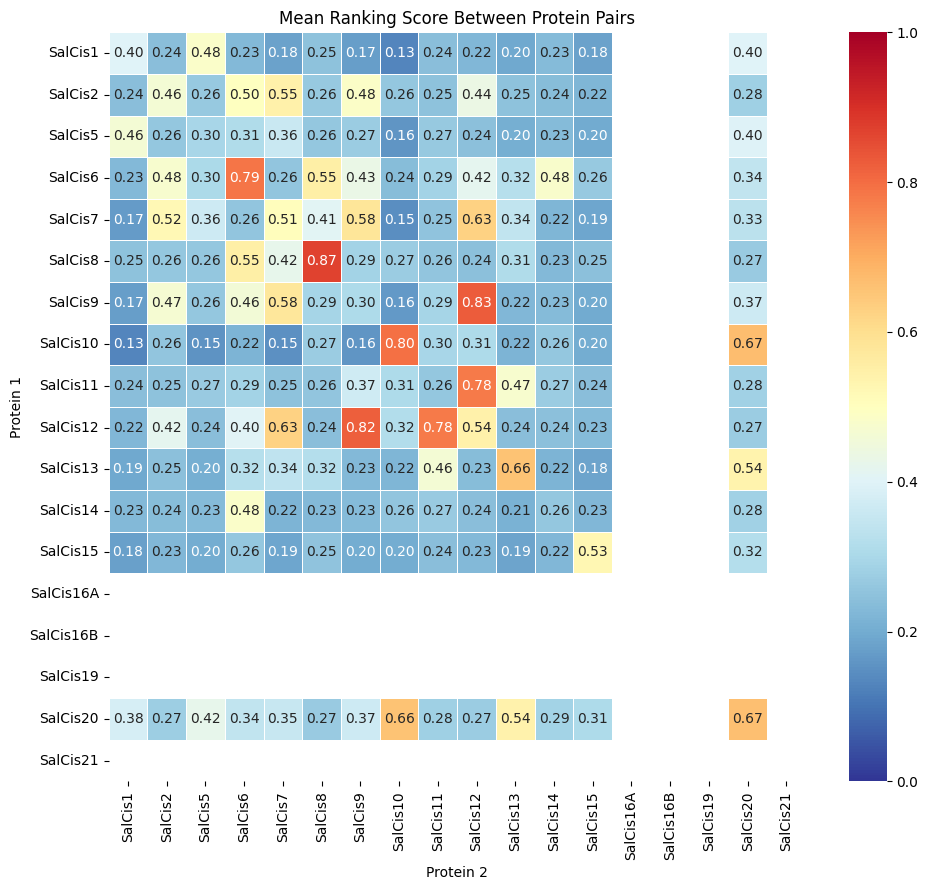

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['ranking_score'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='ranking_score')

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(10, 9))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu_r',
            linewidths=0.5, center=0.50, vmin=0.0, vmax=1.0)
plt.title("Mean Ranking Score Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

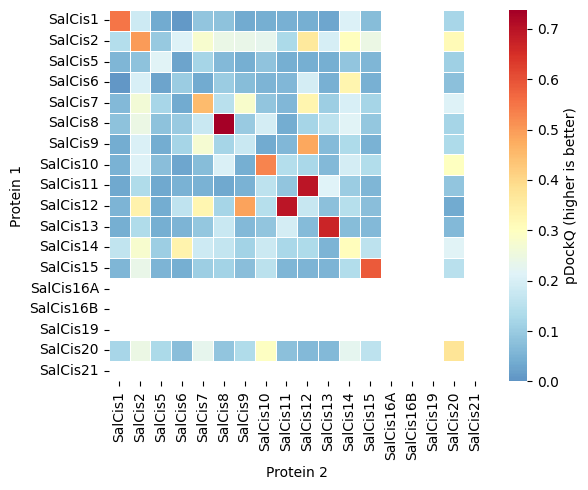

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['pdockq'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='pdockq')


# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data,  cmap='RdYlBu_r', linewidths=0.5,
            center=0.3,vmin=0.0,cbar_kws={'label': 'pDockQ (higher is better)'}
           )
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.savefig('all_v_all_heatmap_pDockQ.png',transparent=True,dpi=600)
plt.show()


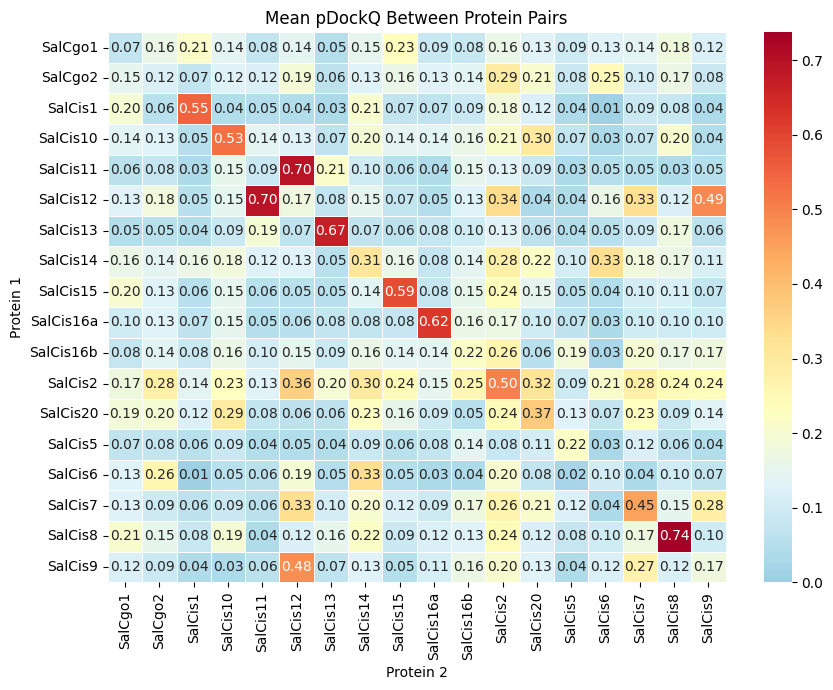

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['pdockq'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='pdockq')

plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu_r', linewidths=0.5,
            center=0.23,vmin=0.0,
           )
plt.title("Mean pDockQ Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

In [20]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,...,Given Nomenclature_x,Size_x,HHPred predicted/experimental function_x,FASTA protein sequence_x,ORF number_y,PlotOrder_y,Given Nomenclature_y,Size_y,HHPred predicted/experimental function_y,FASTA protein sequence_y
0,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
1,salcis1,61,2,./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed...,"[0.15, 0.15]","[[0.63, 0.15], [0.15, 0.63]]","[[0.76, 30.11], [30.25, 0.76]]","[0.63, 0.63]",0.02,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
2,salcis1,61,4,./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-...,"[0.07, 0.07]","[[0.61, 0.07], [0.07, 0.56]]","[[0.76, 28.14], [25.99, 0.76]]","[0.61, 0.56]",0.06,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
3,salcis1,83,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.06, 0.06]","[[0.53, 0.06], [0.06, 0.78]]","[[0.76, 28.23], [28.36, 0.76]]","[0.53, 0.78]",0.08,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
4,salcis1,10,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.08, 0.08]","[[0.59, 0.08], [0.08, 0.76]]","[[0.76, 25.04], [20.64, 0.76]]","[0.59, 0.76]",0.12,0,...,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,SalCgo2,61,1,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.08, 0.08]","[[0.53, 0.08], [0.08, 0.57]]","[[0.76, 21.47], [22.98, 0.76]]","[0.53, 0.57]",0.27,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8096,SalCgo2,61,0,./SalCgo2/output/SalCgo2_SalCIS9/SalCgo2/seed-...,"[0.07, 0.07]","[[0.5, 0.07], [0.07, 0.58]]","[[0.76, 25.19], [23.03, 0.76]]","[0.5, 0.58]",0.23,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8097,SalCgo2,33,2,./SalCgo2/output/SalCgo2_SalCIS11/SalCgo2/seed...,"[0.15, 0.15]","[[0.48, 0.15], [0.15, 0.68]]","[[0.76, 28.75], [28.83, 0.76]]","[0.48, 0.68]",0.04,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
8098,SalCgo2,44,1,./SalCgo2/output/SalCgo2_SalCIS2/SalCgo2/seed-...,"[0.09, 0.09]","[[0.6, 0.09], [0.09, 0.89]]","[[0.76, 27.95], [28.53, 0.76]]","[0.6, 0.89]",0.08,0,...,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...,17,21,SalCgo2,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...


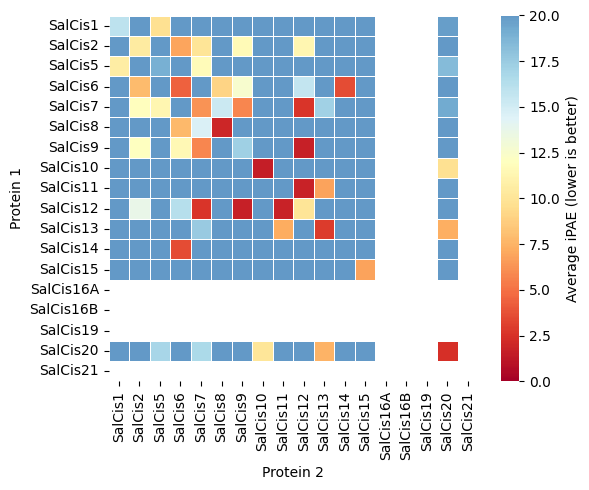

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['avg_ipae'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='avg_ipae')

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, cmap='RdYlBu', linewidths=0.5,
            center=12,vmin=0.0,vmax=20,cbar_kws={'label': 'Average iPAE (lower is better)'},
           )
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()

plt.savefig('all_v_all_heatmap_iPAE.png',transparent=True,dpi=600)
plt.show()

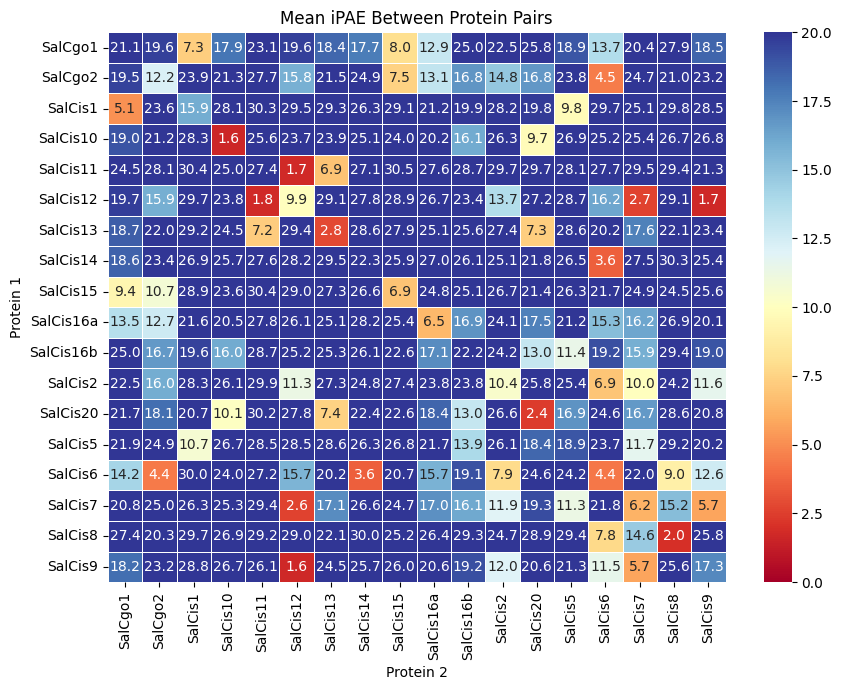

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['avg_ipae'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='avg_ipae')

plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdYlBu', linewidths=0.5,
            center=10,vmin=0.0,vmax=20,
           )
plt.title("Mean iPAE Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

In [23]:
df.to_excel('SALCIS_AF3_all_v_all_results.xlsx')

In [24]:
# Reindex both rows and columns
plot_df = df.reindex(index=order, columns=order)

/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_20042/1626950080.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)


<Figure size 640x480 with 0 Axes>

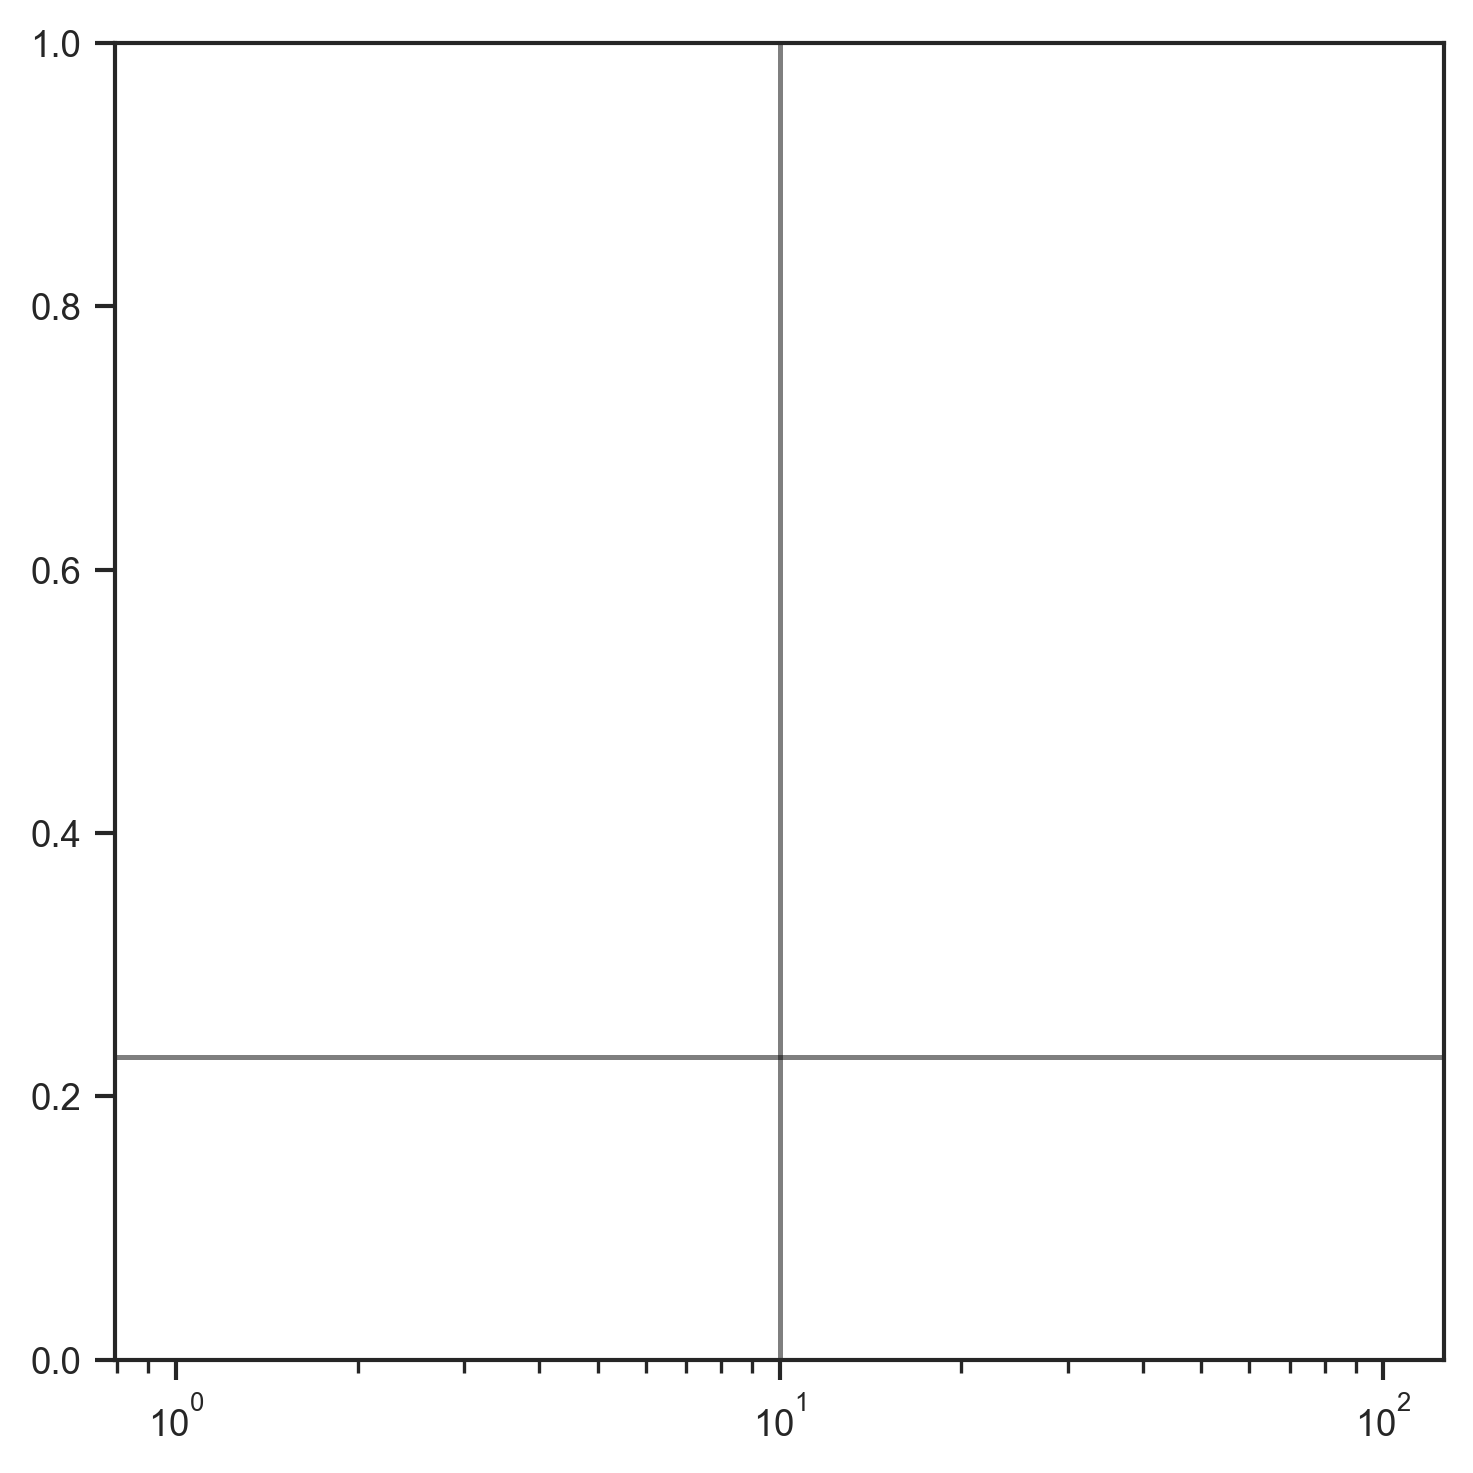

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCis19']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) | (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.savefig('SalCIS19.png',transparent=True,dpi=600)
plt.show()